In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)
from sklearn.datasets import fetch_openml
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


def cross_validation_error(X, y, model, folds):
    average_train_error = []
    average_val_error = []
    X_folds = np.array_split(X, folds)
    start_fold = 0

    for i in range(folds):
        len_fold = X_folds[i].shape[0]
        y_train = y.iloc[[X.index[k] not in list(X_folds[i].index[np.arange(0, len_fold)]) for k in range(X.shape[0])]]
        y_test = [y[X_folds[i].index[j]] for j in range(start_fold, len_fold)]
        train = X.iloc[[X.index[k] not in list(X_folds[i].index[np.arange(0, len_fold)]) for k in range(X.shape[0])]]
        test = X_folds[i]
        model.fit(train, y_train)
        count = 0
        for i in train.index:
            item = train[train.index == i]
            predicted = model.predict(item)
            if predicted != y_train[i]:
                count += 1
        average_train_error.append(count / train.shape[0])
        count = 0
        for i in test.index:
            item = test[test.index == i]
            predicted = model.predict(item)
            if list(y[y.index == i] != predicted)[0]:
                count += 1
        average_val_error.append(count / len(test))
        start_fold += len_fold
    return np.average(average_train_error), np.average(average_val_error)

def fetch_mnist():
    # Download MNIST dataset
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True,as_frame=True)
    # Randomly sample 8000 images
    np.random.seed(2)
    indices = np.random.choice(len(X), 8000, replace=False)
    X, y = X.iloc[indices], y.iloc[indices]
    return X, y

def SVM_results(X_train, y_train, X_test, y_test):
    ## Making a list of all the models
    svcs = [svm.SVC(kernel='linear')]
    values_poly = [2, 4, 6, 8, 10]
    for value in values_poly:
        svcs.append(svm.SVC(kernel='poly', degree=value))
    value_rbf = [0.001, 0.01, 0.1, 1.0, 10]
    for value in value_rbf:
        svcs.append(svm.SVC(kernel='rbf', gamma=value))
    models_dict = {}

    ## Calulating  avg tarin, valdition and test errors
    for svc in svcs:
        ## Calulating train and valdition error
        train_error,vald_error = cross_validation_error(X_train, y_train,svc,5)
        kernel = svc.get_params()['kernel']
        
        ## Calulating test error
        prediction = svc.predict(X_test)
        count = 0
        for i in range(len(prediction)):
            if list(y_test[y_test.index == y_test.index[i]] != prediction[i])[0]:
                count += 1
        error = count / len(prediction)
        
        # Deciding model name
        model_name = 'SVM_' + kernel
        if kernel != 'linear':
            if kernel == 'rbf':
                model_name += '_' + str(svc.get_params()['gamma'])
            else:
                model_name += '_' + str(svc.get_params()['degree'])
        models_dict[model_name] = (train_error,vald_error, error)
    return models_dict

In [2]:
X, y = fetch_mnist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dict = SVM_results(X_train, y_train, X_test, y_test)
print(dict)

{'SVM_linear': (0.0, 0.08875, 0.088125), 'SVM_poly_2': (0.017812500000000002, 0.052812500000000005, 0.05625), 'SVM_poly_4': (0.027773437499999998, 0.08499999999999999, 0.09375), 'SVM_poly_6': (0.09363281250000002, 0.185, 0.188125), 'SVM_poly_8': (0.15675781249999998, 0.2940625, 0.293125), 'SVM_poly_10': (0.2004296875, 0.37203125, 0.36125), 'SVM_rbf_0.001': (0.0, 0.8885937499999998, 0.898125), 'SVM_rbf_0.01': (0.0, 0.8885937499999998, 0.898125), 'SVM_rbf_0.1': (0.0, 0.8885937499999998, 0.898125), 'SVM_rbf_1.0': (0.0, 0.8885937499999998, 0.898125), 'SVM_rbf_10': (0.0, 0.8885937499999998, 0.898125)}


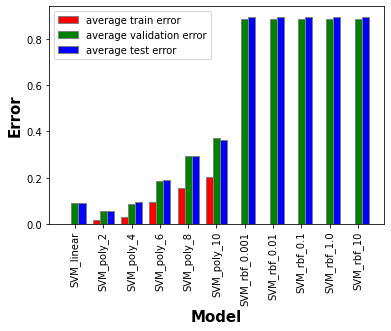

In [ ]:
barWidth = 0.25
fig = plt.figure()

# set height of bar
train_error = [dict[key][0] for key in dict.keys()]
valdiotion_error = [dict[key][1] for key in dict.keys()]
test_error = [dict[key][2] for key in dict.keys()]

# Set position of bar on X axis
br1 = np.arange(len(train_error))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, train_error, color='r', width=barWidth,
        edgecolor='grey', label='average train error')
plt.bar(br2, valdiotion_error, color='g', width=barWidth,
        edgecolor='grey', label='average validation error')
plt.bar(br3, test_error, color='b', width=barWidth,
        edgecolor='grey', label='average test error')

# Adding Xticks
plt.xlabel('Model', fontweight='bold', fontsize=15)
plt.ylabel('Error', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(train_error))],
           [str(model) for model in dict.keys()])
plt.xticks(rotation=90)
plt.legend()
plt.show()

